In [4]:
import cx_Oracle
conn=cx_Oracle.connect('hr/hr@localhost:1521/xe')
cursor=conn.cursor()


상품수: 0


In [7]:
sql="delete from product"
cursor.execute(sql)

In [10]:
items=[(1,'레몬',1500,'레몬에 포함된 구연산은 피로회복에 좋습니다. 비타민 C도 풍부합니다.','lemon.jpg'), 
(2,'오렌지',2000,'비타민 C가 풍부합니다. 생과일 주스로 마시면 좋습니다.','orange.jpg'),
(3,'키위',3000,'비타민 C가 매우 풍부합니다. 다이어트나 미용에 좋습니다.','kiwi.jpg'),
(4,'포도',5000,'폴리페놀을 다량 함유하고 있어 항산화 작용을 합니다.','grape.jpg'),
(5,'딸기',8000,'비타민 C나 플라보노이드를 다량 함유하고 있습니다.','strawberry.jpg'),
(6,'귤',7000,'시네피린을 함유하고 있어 감기 예방에 좋다고 합니다.','tangerine.jpg')
]

for row in items:
    sql = "insert into product values (:1,:2,:3,:4,:5)"
    cursor.execute(sql, row)
sql="select count(*) from product"
cursor.execute(sql)
count=cursor.fetchone()
print('상품개수:',count[0])

상품개수: 6


In [11]:
sql='select count(*) from product'
cursor.execute(sql)
count=cursor.fetchone()
print('상품수:',count[0])

상품수: 6


In [6]:
sql='select * from product'
cursor.execute(sql)
for row in cursor:
    description=row[3].read()
    print(row)
    print(description)

(1, '레몬', 1500, <cx_Oracle.LOB object at 0x000001BF77297390>, 'lemon.jpg')
레몬에 포함된 구연산은 피로회복에 좋습니다. 비타민 C도 풍부합니다.
(2, '오렌지', 2000, <cx_Oracle.LOB object at 0x000001BF77290C60>, 'orange.jpg')
비타민 C가 풍부합니다. 생과일 주스로 마시면 좋습니다.
(3, '키위', 3000, <cx_Oracle.LOB object at 0x000001BF77290D50>, 'kiwi.jpg')
비타민 C가 매우 풍부합니다. 다이어트나 미용에 좋습니다.
(4, '포도', 5000, <cx_Oracle.LOB object at 0x000001BF77290C60>, 'grape.jpg')
폴리페놀을 다량 함유하고 있어 항산화 작용을 합니다.
(5, '딸기', 8000, <cx_Oracle.LOB object at 0x000001BF77290D50>, 'strawberry.jpg')
비타민 C나 플라보노이드를 다량 함유하고 있습니다.
(6, '귤', 7000, <cx_Oracle.LOB object at 0x000001BF77297390>, 'tangerine.jpg')
시네피린을 함유하고 있어 감기 예방에 좋다고 합니다.


In [12]:
sql ="delete from product where product_id=6"
cursor.execute(sql)

In [13]:
sql="delete from product"
cursor.execute(sql)

In [14]:
sql="insert into product values (:1,:2,:3,:4,:5)"
cursor.bindarraysize=len(items)
cursor.executemany(sql,items)

In [15]:
sql="select * from product"
cursor.execute(sql)
rs=cursor.fetchall()
print('\n레코드셋:',rs)
for row in rs:
    print(row)

conn.commit()
cursor.close()
conn.close()


레코드셋: [(1, '레몬', 1500, <cx_Oracle.LOB object at 0x000001BF772904B0>, 'lemon.jpg'), (2, '오렌지', 2000, <cx_Oracle.LOB object at 0x000001BF771854E0>, 'orange.jpg'), (3, '키위', 3000, <cx_Oracle.LOB object at 0x000001BF771852A0>, 'kiwi.jpg'), (4, '포도', 5000, <cx_Oracle.LOB object at 0x000001BF7C4A7990>, 'grape.jpg'), (5, '딸기', 8000, <cx_Oracle.LOB object at 0x000001BF7C4A7DE0>, 'strawberry.jpg'), (6, '귤', 7000, <cx_Oracle.LOB object at 0x000001BF7C4A7BA0>, 'tangerine.jpg')]
(1, '레몬', 1500, <cx_Oracle.LOB object at 0x000001BF772904B0>, 'lemon.jpg')
(2, '오렌지', 2000, <cx_Oracle.LOB object at 0x000001BF771854E0>, 'orange.jpg')
(3, '키위', 3000, <cx_Oracle.LOB object at 0x000001BF771852A0>, 'kiwi.jpg')
(4, '포도', 5000, <cx_Oracle.LOB object at 0x000001BF7C4A7990>, 'grape.jpg')
(5, '딸기', 8000, <cx_Oracle.LOB object at 0x000001BF7C4A7DE0>, 'strawberry.jpg')
(6, '귤', 7000, <cx_Oracle.LOB object at 0x000001BF7C4A7BA0>, 'tangerine.jpg')


In [16]:
import cx_Oracle
conn=cx_Oracle.connect('hr/hr@localhost:1521/xe')
cursor=conn.cursor()
sql='''
select s.majorno,mname,count(*)
from stud s, major m
where s.majorno=m.majorno
group by s.majorno,mname
order by s.majorno
'''
cursor.execute(sql)
rows=cursor.fetchall()
for row in rows:
    print(row)
cursor.close()
conn.close()

(101, '컴퓨터공학', 7)
(102, '데이터사이언스', 4)
(103, '소프트웨어공학', 1)
(201, '전자공학', 4)
(202, '기계공학', 2)
(301, '문헌정보학', 2)


In [17]:
x=list(range(1,7))
names=[]
y=[]
for row in rows:
    names.append(row[1])
    y.append(row[2])
print(x)
print(names)
print(y)

[1, 2, 3, 4, 5, 6]
['컴퓨터공학', '데이터사이언스', '소프트웨어공학', '전자공학', '기계공학', '문헌정보학']
[7, 4, 1, 4, 2, 2]


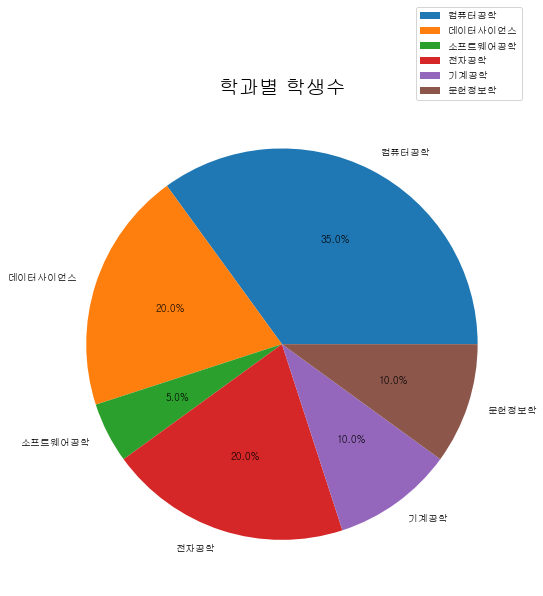

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc,font_manager
font_name=font_manager.FontProperties(
    fname='c:/windows/fonts/gulim.ttc').get_name()
rc('font',family=font_name)
plt.rcParams['figure.figsize']=(16,9)
plt.title('학과별 학생수',fontsize=20)
plt.pie(y,labels=names,autopct='%.1f%%')
plt.legend(names,bbox_to_anchor=[1,1.2])

In [1]:
import pandas as pd
df=pd.read_csv('c:/data/iris/iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [22]:
from sqlalchemy import create_engine
engine=create_engine('oracle+cx_oracle://hr:hr@xe')
conn=engine.connect()
df.to_sql(name='iris', con=engine, if_exists='replace',index=False)